# Problem Statement :
Human activity recognition is the problem of classifying sequences of accelerometer data recorded by specialized harnesses or smart phones into known well-defined movements.

It is a challenging problem given the large number of observations produced each second, the temporal nature of the observations, and the lack of a clear way to relate accelerometer data to known movements.

# Data Collection:
The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data. The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain.

# import required libraries:

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# reading the data:

In [6]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
print(train.shape)
print(test.shape)
print(type(train),type(test))

(7352, 564)
(2947, 564)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


# displaying the features:

In [7]:
pd.options.display.max_seq_items=600 #to display all the items in the list
train.columns #to display columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX', 'tBodyAccmaxY', 'tBodyAccmaxZ',
       'tBodyAccminX', 'tBodyAccminY', 'tBodyAccminZ', 'tBodyAccsma',
       'tBodyAccenergyX', 'tBodyAccenergyY', 'tBodyAccenergyZ', 'tBodyAcciqrX',
       'tBodyAcciqrY', 'tBodyAcciqrZ', 'tBodyAccentropyX', 'tBodyAccentropyY',
       'tBodyAccentropyZ', 'tBodyAccarCoeffX1', 'tBodyAccarCoeffX2',
       'tBodyAccarCoeffX3', 'tBodyAccarCoeffX4', 'tBodyAccarCoeffY1',
       'tBodyAccarCoeffY2', 'tBodyAccarCoeffY3', 'tBodyAccarCoeffY4',
       'tBodyAccarCoeffZ1', 'tBodyAccarCoeffZ2', 'tBodyAccarCoeffZ3',
       'tBodyAccarCoeffZ4', 'tBodyAcccorrelationXY', 'tBodyAcccorrelationXZ',
       'tBodyAcccorrelationYZ', 'tGravityAccmeanX', 'tGravityAccmeanY',
       'tGravityAccmeanZ', 'tGravityAccstdX', 'tGravityAccstdY',
       'tGravityAccstdZ', 'tGravityAccmadX', 'tGravityAccmadY

# checking for NULL values:

In [8]:
pd.options.display.max_rows=600
train.isnull().sum()

tBodyAccmeanX                        0
tBodyAccmeanY                        0
tBodyAccmeanZ                        0
tBodyAccstdX                         0
tBodyAccstdY                         0
tBodyAccstdZ                         0
tBodyAccmadX                         0
tBodyAccmadY                         0
tBodyAccmadZ                         0
tBodyAccmaxX                         0
tBodyAccmaxY                         0
tBodyAccmaxZ                         0
tBodyAccminX                         0
tBodyAccminY                         0
tBodyAccminZ                         0
tBodyAccsma                          0
tBodyAccenergyX                      0
tBodyAccenergyY                      0
tBodyAccenergyZ                      0
tBodyAcciqrX                         0
tBodyAcciqrY                         0
tBodyAcciqrZ                         0
tBodyAccentropyX                     0
tBodyAccentropyY                     0
tBodyAccentropyZ                     0
tBodyAccarCoeffX1        

In [9]:
pd.options.display.max_columns=600
train.describe()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,tBodyAccmaxY,tBodyAccmaxZ,tBodyAccminX,tBodyAccminY,tBodyAccminZ,tBodyAccsma,tBodyAccenergyX,tBodyAccenergyY,tBodyAccenergyZ,tBodyAcciqrX,tBodyAcciqrY,tBodyAcciqrZ,tBodyAccentropyX,tBodyAccentropyY,tBodyAccentropyZ,tBodyAccarCoeffX1,tBodyAccarCoeffX2,tBodyAccarCoeffX3,tBodyAccarCoeffX4,tBodyAccarCoeffY1,tBodyAccarCoeffY2,tBodyAccarCoeffY3,tBodyAccarCoeffY4,tBodyAccarCoeffZ1,tBodyAccarCoeffZ2,tBodyAccarCoeffZ3,tBodyAccarCoeffZ4,tBodyAcccorrelationXY,tBodyAcccorrelationXZ,tBodyAcccorrelationYZ,tGravityAccmeanX,tGravityAccmeanY,tGravityAccmeanZ,tGravityAccstdX,tGravityAccstdY,tGravityAccstdZ,tGravityAccmadX,tGravityAccmadY,tGravityAccmadZ,tGravityAccmaxX,tGravityAccmaxY,tGravityAccmaxZ,tGravityAccminX,tGravityAccminY,tGravityAccminZ,tGravityAccsma,tGravityAccenergyX,tGravityAccenergyY,tGravityAccenergyZ,tGravityAcciqrX,tGravityAcciqrY,tGravityAcciqrZ,tGravityAccentropyX,tGravityAccentropyY,tGravityAccentropyZ,tGravityAccarCoeffX1,tGravityAccarCoeffX2,tGravityAccarCoeffX3,tGravityAccarCoeffX4,tGravityAccarCoeffY1,tGravityAccarCoeffY2,tGravityAccarCoeffY3,tGravityAccarCoeffY4,tGravityAccarCoeffZ1,tGravityAccarCoeffZ2,tGravityAccarCoeffZ3,tGravityAccarCoeffZ4,tGravityAcccorrelationXY,tGravityAcccorrelationXZ,tGravityAcccorrelationYZ,tBodyAccJerkmeanX,tBodyAccJerkmeanY,tBodyAccJerkmeanZ,tBodyAccJerkstdX,tBodyAccJerkstdY,tBodyAccJerkstdZ,tBodyAccJerkmadX,tBodyAccJerkmadY,tBodyAccJerkmadZ,tBodyAccJerkmaxX,tBodyAccJerkmaxY,tBodyAccJerkmaxZ,tBodyAccJerkminX,tBodyAccJerkminY,tBodyAccJerkminZ,tBodyAccJerksma,tBodyAccJerkenergyX,tBodyAccJerkenergyY,tBodyAccJerkenergyZ,tBodyAccJerkiqrX,tBodyAccJerkiqrY,tBodyAccJerkiqrZ,tBodyAccJerkentropyX,tBodyAccJerkentropyY,tBodyAccJerkentropyZ,tBodyAccJerkarCoeffX1,tBodyAccJerkarCoeffX2,tBodyAccJerkarCoeffX3,tBodyAccJerkarCoeffX4,tBodyAccJerkarCoeffY1,tBodyAccJerkarCoeffY2,tBodyAccJerkarCoeffY3,tBodyAccJerkarCoeffY4,tBodyAccJerkarCoeffZ1,tBodyAccJerkarCoeffZ2,tBodyAccJerkarCoeffZ3,tBodyAccJerkarCoeffZ4,tBodyAccJerkcorrelationXY,tBodyAccJerkcorrelationXZ,tBodyAccJerkcorrelationYZ,tBodyGyromeanX,tBodyGyromeanY,tBodyGyromeanZ,tBodyGyrostdX,tBodyGyrostdY,tBodyGyrostdZ,tBodyGyromadX,tBodyGyromadY,tBodyGyromadZ,tBodyGyromaxX,tBodyGyromaxY,tBodyGyromaxZ,tBodyGyrominX,tBodyGyrominY,tBodyGyrominZ,tBodyGyrosma,tBodyGyroenergyX,tBodyGyroenergyY,tBodyGyroenergyZ,tBodyGyroiqrX,tBodyGyroiqrY,tBodyGyroiqrZ,tBodyGyroentropyX,tBodyGyroentropyY,tBodyGyroentropyZ,tBodyGyroarCoeffX1,tBodyGyroarCoeffX2,tBodyGyroarCoeffX3,tBodyGyroarCoeffX4,tBodyGyroarCoeffY1,tBodyGyroarCoeffY2,tBodyGyroarCoeffY3,tBodyGyroarCoeffY4,tBodyGyroarCoeffZ1,tBodyGyroarCoeffZ2,tBodyGyroarCoeffZ3,tBodyGyroarCoeffZ4,tBodyGyrocorrelationXY,tBodyGyrocorrelationXZ,tBodyGyrocorrelationYZ,tBodyGyroJerkmeanX,tBodyGyroJerkmeanY,tBodyGyroJerkmeanZ,tBodyGyroJerkstdX,tBodyGyroJerkstdY,tBodyGyroJerkstdZ,tBodyGyroJerkmadX,tBodyGyroJerkmadY,tBodyGyroJerkmadZ,tBodyGyroJerkmaxX,tBodyGyroJerkmaxY,tBodyGyroJerkmaxZ,tBodyGyroJerkminX,tBodyGyroJerkminY,tBodyGyroJerkminZ,tBodyGyroJerksma,tBodyGyroJerkenergyX,tBodyGyroJerkenergyY,tBodyGyroJerkenergyZ,tBodyGyroJerkiqrX,tBodyGyroJerkiqrY,tBodyGyroJerkiqrZ,tBodyGyroJerkentropyX,tBodyGyroJerkentropyY,tBodyGyroJerkentropyZ,tBodyGyroJerkarCoeffX1,tBodyGyroJerkarCoeffX2,tBodyGyroJerkarCoeffX3,tBodyGyroJerkarCoeffX4,tBodyGyroJerkarCoeffY1,tBodyGyroJerkarCoeffY2,tBodyGyroJerkarCoeffY3,tBodyGyroJerkarCoeffY4,tBodyGyroJerkarCoeffZ1,tBodyGyroJerkarCoeffZ2,tBodyGyroJerkarCoeffZ3,tBodyGyroJerkarCoeffZ4,tBodyGyroJerkcorrelationXY,tBodyGyroJerkcorrelationXZ,tBodyGyroJerkcorrelationYZ,tBodyAccMagmean,tBodyAccMagstd,tBodyAccMagmad,tBodyAccMagmax,tBodyAccMagmin,tBodyAccMagsma,tBodyAccMagenergy,tBodyAccMagiqr,tBodyAccMagentropy,tBodyAccMagarCoeff1,tBodyAccMagarCoeff2,tBodyAccMagarCoeff3,tBodyAccMagarCoeff4,tGravityAccMagmean,tGravityAccMagstd,tGravityAccMagmad,tGravityAccMagmax,tGravityAccMagmin,tGravityAccMags

In [10]:
test.describe(include='all')

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,tBodyAccmaxY,tBodyAccmaxZ,tBodyAccminX,tBodyAccminY,tBodyAccminZ,tBodyAccsma,tBodyAccenergyX,tBodyAccenergyY,tBodyAccenergyZ,tBodyAcciqrX,tBodyAcciqrY,tBodyAcciqrZ,tBodyAccentropyX,tBodyAccentropyY,tBodyAccentropyZ,tBodyAccarCoeffX1,tBodyAccarCoeffX2,tBodyAccarCoeffX3,tBodyAccarCoeffX4,tBodyAccarCoeffY1,tBodyAccarCoeffY2,tBodyAccarCoeffY3,tBodyAccarCoeffY4,tBodyAccarCoeffZ1,tBodyAccarCoeffZ2,tBodyAccarCoeffZ3,tBodyAccarCoeffZ4,tBodyAcccorrelationXY,tBodyAcccorrelationXZ,tBodyAcccorrelationYZ,tGravityAccmeanX,tGravityAccmeanY,tGravityAccmeanZ,tGravityAccstdX,tGravityAccstdY,tGravityAccstdZ,tGravityAccmadX,tGravityAccmadY,tGravityAccmadZ,tGravityAccmaxX,tGravityAccmaxY,tGravityAccmaxZ,tGravityAccminX,tGravityAccminY,tGravityAccminZ,tGravityAccsma,tGravityAccenergyX,tGravityAccenergyY,tGravityAccenergyZ,tGravityAcciqrX,tGravityAcciqrY,tGravityAcciqrZ,tGravityAccentropyX,tGravityAccentropyY,tGravityAccentropyZ,tGravityAccarCoeffX1,tGravityAccarCoeffX2,tGravityAccarCoeffX3,tGravityAccarCoeffX4,tGravityAccarCoeffY1,tGravityAccarCoeffY2,tGravityAccarCoeffY3,tGravityAccarCoeffY4,tGravityAccarCoeffZ1,tGravityAccarCoeffZ2,tGravityAccarCoeffZ3,tGravityAccarCoeffZ4,tGravityAcccorrelationXY,tGravityAcccorrelationXZ,tGravityAcccorrelationYZ,tBodyAccJerkmeanX,tBodyAccJerkmeanY,tBodyAccJerkmeanZ,tBodyAccJerkstdX,tBodyAccJerkstdY,tBodyAccJerkstdZ,tBodyAccJerkmadX,tBodyAccJerkmadY,tBodyAccJerkmadZ,tBodyAccJerkmaxX,tBodyAccJerkmaxY,tBodyAccJerkmaxZ,tBodyAccJerkminX,tBodyAccJerkminY,tBodyAccJerkminZ,tBodyAccJerksma,tBodyAccJerkenergyX,tBodyAccJerkenergyY,tBodyAccJerkenergyZ,tBodyAccJerkiqrX,tBodyAccJerkiqrY,tBodyAccJerkiqrZ,tBodyAccJerkentropyX,tBodyAccJerkentropyY,tBodyAccJerkentropyZ,tBodyAccJerkarCoeffX1,tBodyAccJerkarCoeffX2,tBodyAccJerkarCoeffX3,tBodyAccJerkarCoeffX4,tBodyAccJerkarCoeffY1,tBodyAccJerkarCoeffY2,tBodyAccJerkarCoeffY3,tBodyAccJerkarCoeffY4,tBodyAccJerkarCoeffZ1,tBodyAccJerkarCoeffZ2,tBodyAccJerkarCoeffZ3,tBodyAccJerkarCoeffZ4,tBodyAccJerkcorrelationXY,tBodyAccJerkcorrelationXZ,tBodyAccJerkcorrelationYZ,tBodyGyromeanX,tBodyGyromeanY,tBodyGyromeanZ,tBodyGyrostdX,tBodyGyrostdY,tBodyGyrostdZ,tBodyGyromadX,tBodyGyromadY,tBodyGyromadZ,tBodyGyromaxX,tBodyGyromaxY,tBodyGyromaxZ,tBodyGyrominX,tBodyGyrominY,tBodyGyrominZ,tBodyGyrosma,tBodyGyroenergyX,tBodyGyroenergyY,tBodyGyroenergyZ,tBodyGyroiqrX,tBodyGyroiqrY,tBodyGyroiqrZ,tBodyGyroentropyX,tBodyGyroentropyY,tBodyGyroentropyZ,tBodyGyroarCoeffX1,tBodyGyroarCoeffX2,tBodyGyroarCoeffX3,tBodyGyroarCoeffX4,tBodyGyroarCoeffY1,tBodyGyroarCoeffY2,tBodyGyroarCoeffY3,tBodyGyroarCoeffY4,tBodyGyroarCoeffZ1,tBodyGyroarCoeffZ2,tBodyGyroarCoeffZ3,tBodyGyroarCoeffZ4,tBodyGyrocorrelationXY,tBodyGyrocorrelationXZ,tBodyGyrocorrelationYZ,tBodyGyroJerkmeanX,tBodyGyroJerkmeanY,tBodyGyroJerkmeanZ,tBodyGyroJerkstdX,tBodyGyroJerkstdY,tBodyGyroJerkstdZ,tBodyGyroJerkmadX,tBodyGyroJerkmadY,tBodyGyroJerkmadZ,tBodyGyroJerkmaxX,tBodyGyroJerkmaxY,tBodyGyroJerkmaxZ,tBodyGyroJerkminX,tBodyGyroJerkminY,tBodyGyroJerkminZ,tBodyGyroJerksma,tBodyGyroJerkenergyX,tBodyGyroJerkenergyY,tBodyGyroJerkenergyZ,tBodyGyroJerkiqrX,tBodyGyroJerkiqrY,tBodyGyroJerkiqrZ,tBodyGyroJerkentropyX,tBodyGyroJerkentropyY,tBodyGyroJerkentropyZ,tBodyGyroJerkarCoeffX1,tBodyGyroJerkarCoeffX2,tBodyGyroJerkarCoeffX3,tBodyGyroJerkarCoeffX4,tBodyGyroJerkarCoeffY1,tBodyGyroJerkarCoeffY2,tBodyGyroJerkarCoeffY3,tBodyGyroJerkarCoeffY4,tBodyGyroJerkarCoeffZ1,tBodyGyroJerkarCoeffZ2,tBodyGyroJerkarCoeffZ3,tBodyGyroJerkarCoeffZ4,tBodyGyroJerkcorrelationXY,tBodyGyroJerkcorrelationXZ,tBodyGyroJerkcorrelationYZ,tBodyAccMagmean,tBodyAccMagstd,tBodyAccMagmad,tBodyAccMagmax,tBodyAccMagmin,tBodyAccMagsma,tBodyAccMagenergy,tBodyAccMagiqr,tBodyAccMagentropy,tBodyAccMagarCoeff1,tBodyAccMagarCoeff2,tBodyAccMagarCoeff3,tBodyAccMagarCoeff4,tGravityAccMagmean,tGravityAccMagstd,tGravityAccMagmad,tGravityAccMagmax,tGravityAccMagmin,tGravityAccMags

In [11]:
train.dtypes

tBodyAccmeanX                        float64
tBodyAccmeanY                        float64
tBodyAccmeanZ                        float64
tBodyAccstdX                         float64
tBodyAccstdY                         float64
tBodyAccstdZ                         float64
tBodyAccmadX                         float64
tBodyAccmadY                         float64
tBodyAccmadZ                         float64
tBodyAccmaxX                         float64
tBodyAccmaxY                         float64
tBodyAccmaxZ                         float64
tBodyAccminX                         float64
tBodyAccminY                         float64
tBodyAccminZ                         float64
tBodyAccsma                          float64
tBodyAccenergyX                      float64
tBodyAccenergyY                      float64
tBodyAccenergyZ                      float64
tBodyAcciqrX                         float64
tBodyAcciqrY                         float64
tBodyAcciqrZ                         float64
tBodyAccen

In [12]:
train.dtypes

tBodyAccmeanX                        float64
tBodyAccmeanY                        float64
tBodyAccmeanZ                        float64
tBodyAccstdX                         float64
tBodyAccstdY                         float64
tBodyAccstdZ                         float64
tBodyAccmadX                         float64
tBodyAccmadY                         float64
tBodyAccmadZ                         float64
tBodyAccmaxX                         float64
tBodyAccmaxY                         float64
tBodyAccmaxZ                         float64
tBodyAccminX                         float64
tBodyAccminY                         float64
tBodyAccminZ                         float64
tBodyAccsma                          float64
tBodyAccenergyX                      float64
tBodyAccenergyY                      float64
tBodyAccenergyZ                      float64
tBodyAcciqrX                         float64
tBodyAcciqrY                         float64
tBodyAcciqrZ                         float64
tBodyAccen

# Exploratory visualization

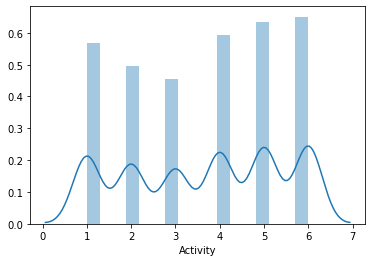

In [13]:
sns.distplot(train.Activity)

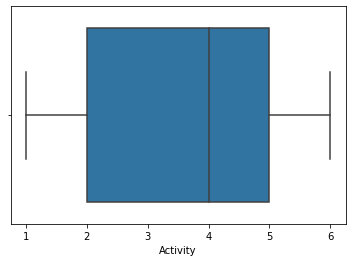

In [14]:
sns.boxplot(train["Activity"])

# Checking for categorical data:

In [15]:
train.select_dtypes(include=['float','int']).columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX', 'tBodyAccmaxY', 'tBodyAccmaxZ',
       'tBodyAccminX', 'tBodyAccminY', 'tBodyAccminZ', 'tBodyAccsma',
       'tBodyAccenergyX', 'tBodyAccenergyY', 'tBodyAccenergyZ', 'tBodyAcciqrX',
       'tBodyAcciqrY', 'tBodyAcciqrZ', 'tBodyAccentropyX', 'tBodyAccentropyY',
       'tBodyAccentropyZ', 'tBodyAccarCoeffX1', 'tBodyAccarCoeffX2',
       'tBodyAccarCoeffX3', 'tBodyAccarCoeffX4', 'tBodyAccarCoeffY1',
       'tBodyAccarCoeffY2', 'tBodyAccarCoeffY3', 'tBodyAccarCoeffY4',
       'tBodyAccarCoeffZ1', 'tBodyAccarCoeffZ2', 'tBodyAccarCoeffZ3',
       'tBodyAccarCoeffZ4', 'tBodyAcccorrelationXY', 'tBodyAcccorrelationXZ',
       'tBodyAcccorrelationYZ', 'tGravityAccmeanX', 'tGravityAccmeanY',
       'tGravityAccmeanZ', 'tGravityAccstdX', 'tGravityAccstdY',
       'tGravityAccstdZ', 'tGravityAccmadX', 'tGravityAccmadY

# Data Visualizations:
Visualizing the class imbalance in the Output Columns
This helps us to present how accurately the classification can be done, as , any high imblances in the data might lead to mispredictions

In [16]:
train.Activity.unique()

array([5, 4, 6, 1, 3, 2], dtype=int64)

In [17]:
train["Activity"].value_counts()

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: Activity, dtype: int64

In [18]:
train["ActivityName"].value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: ActivityName, dtype: int64

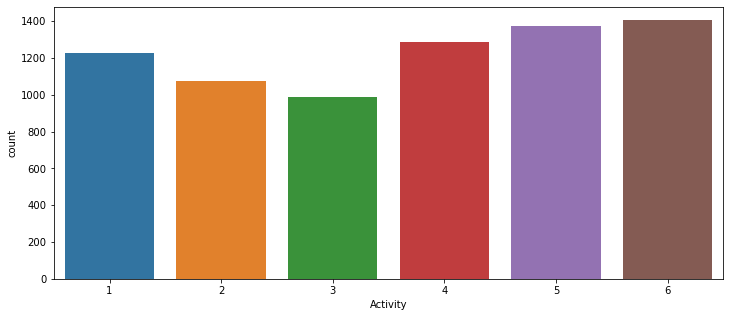

In [19]:
plt.subplots(figsize=(12,5))
sns.countplot(train.Activity)

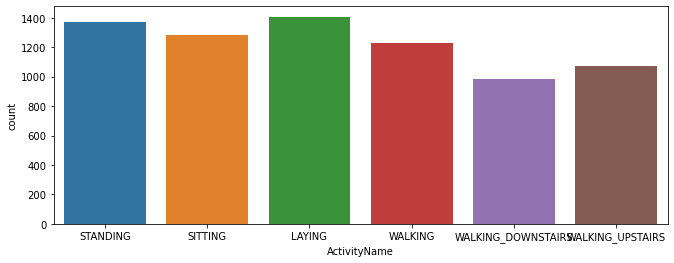

In [20]:
plt.subplots(figsize=(11,4))
sns.countplot(train.ActivityName)

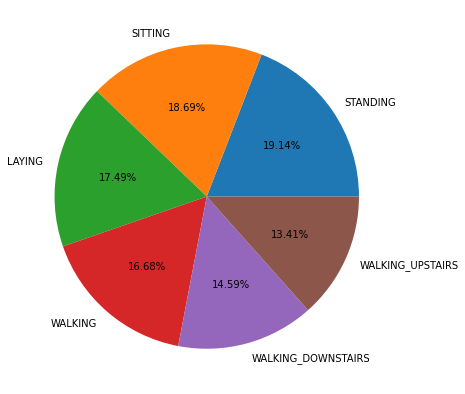

In [21]:
plt.subplots(figsize=(7,7))
plt.pie(train.ActivityName.value_counts(),labels=train.ActivityName.unique(),autopct='%1.2f%%')
plt.show()

# Here we're going to split the 'train' DataFrame into x_train,y_train,x_test,y_test and feed them to the models and then, we will be passing the 'test' DataFrame as raw data to obtain predictions from the model

In [22]:
train.drop(['subject'],axis=1,inplace=True)
test.drop(['subject'],axis=1,inplace=True)

# Train-Test-Split

In [23]:
x=train.drop(['ActivityName'],axis=1)
y=train.ActivityName
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

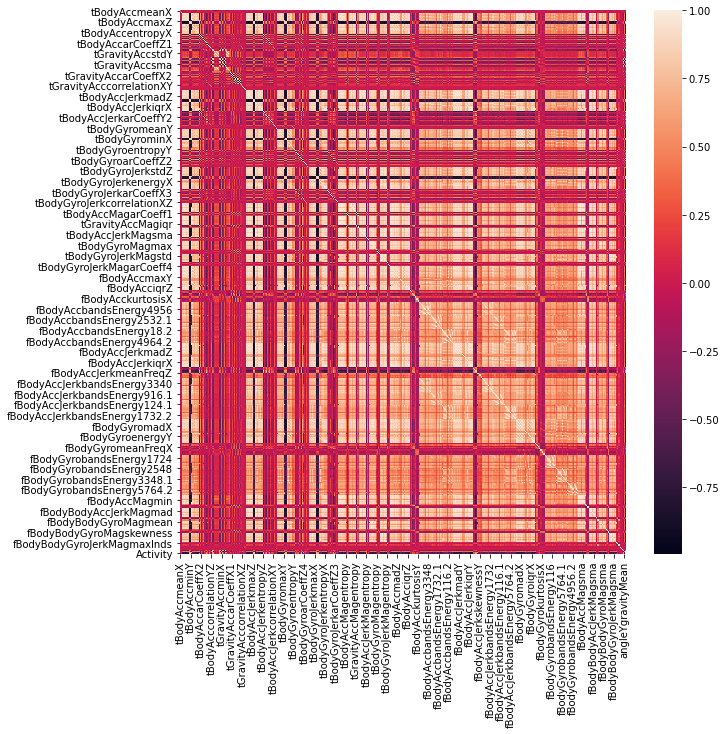

In [24]:
plt.subplots(figsize=(10,10))
sns.heatmap(x_train.corr())

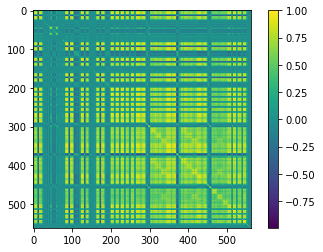

In [25]:
plt.imshow(train.corr())
plt.colorbar()


# MODELING, TRAINING & TESTING:

# Logistic Regression

In [26]:

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
lr_train_predict=lr.predict(x_train)
lr_test_predict=lr.predict(x_test)

In [28]:
train_accu_score=np.zeros(4) ##to store the training accuracies of all the models
test_accu_score=np.zeros(4) ##to store the testing accuracies of all models


In [29]:
print("Logistic Regression Train Accuracy: ",train_accu_score[0])
print("Logistic Regression Test Accuracy: ",test_accu_score[0])

Logistic Regression Train Accuracy:  0.0
Logistic Regression Test Accuracy:  0.0


In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,lr_train_predict)


1.0

# K-Nearest Neighbors Classifier:

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knc_init=KNeighborsClassifier(n_neighbors=20,metric='euclidean')
knc_init.fit(x_train,y_train)
knc_init_train_predict=knc_init.predict(x_train)
knc_init_test_predict=knc_init.predict(x_test)

In [36]:
print("train: ",accuracy_score(y_train,knc_init_train_predict))
print("test: ",accuracy_score(y_test,knc_init_test_predict))

train:  0.9897976534602959
test:  0.9870836165873556


In [37]:
knc=KNeighborsClassifier(n_neighbors=1,metric='euclidean')
knc.fit(x_train,y_train)
knc_train_predict=knc.predict(x_train)
knc_test_predict=knc.predict(x_test)
#checking the metrics
train_accu_score[1]=accuracy_score(y_train,knc_train_predict)
test_accu_score[1]=accuracy_score(y_test,knc_test_predict)
print("KNN Classifier Train Accuracy: ",train_accu_score[1])
print("KNN Classifier Test Accuracy: ",test_accu_score[1])

KNN Classifier Train Accuracy:  1.0
KNN Classifier Test Accuracy:  0.9932019034670292


In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(x_test,x_train)

ValueError: Found input variables with inconsistent numbers of samples: [1471, 5881]

# Naive Bayes:

In [41]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
nb_train_predict=nb.predict(x_train)
nb_test_predict=nb.predict(x_test)
#checking the metrics
train_accu_score[2]=accuracy_score(y_train,nb_train_predict)
test_accu_score[2]=accuracy_score(y_test,nb_test_predict)
print("Naive Bayes Classifier Train Accuracy: ",train_accu_score[2])
print("Naive Bayes Test Accuracy: ",test_accu_score[2])

Naive Bayes Classifier Train Accuracy:  1.0
Naive Bayes Test Accuracy:  1.0


# Random Forest Classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(criterion='entropy')
rfc.fit(x_train,y_train)
rfc_train_predict=rfc.predict(x_train)
rfc_test_predict=rfc.predict(x_test)
#checking the metrics
train_accu_score[3]=accuracy_score(y_train,rfc_train_predict)
test_accu_score[3]=accuracy_score(y_test,rfc_test_predict)
print("Random Forest Classifier Train Accuracy: ",train_accu_score[3])
print("Random Forest Classifier Test Accuracy: ",test_accu_score[3])

Random Forest Classifier Train Accuracy:  1.0
Random Forest Classifier Test Accuracy:  0.9952413324269205


Text(0.5, 1.0, 'Test Accuracy of various algorithms')

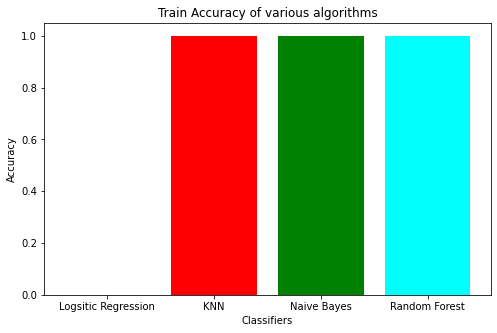

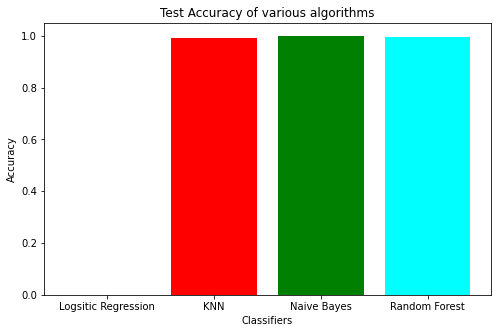

In [46]:
plt.subplots(figsize=(8,5))
labels = ['Logsitic Regression', 'KNN','Naive Bayes','Random Forest']
plt.bar(labels,train_accu_score,color=['black', 'red', 'green', 'cyan'])
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Train Accuracy of various algorithms')


plt.subplots(figsize=(8,5))
labels = ['Logsitic Regression', 'KNN','Naive Bayes','Random Forest']
plt.bar(labels,test_accu_score,color=['black', 'red', 'green','cyan'])
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Test Accuracy of various algorithms')